# SubScript Leaderboard Explorer

1. Explore the leaderboard data
2. Use clustering to determine the core users of the service based on their activity
3. Find out which activities are most salient for each cluster

## Dependencies and Defaults

In [1]:
import config
import pandas as pd
import numpy as np
import os

In [2]:
dir_home = config.home_dir
dir_clean = config.clean_dir
dir_processed = config.processed_dir
dir_raw = config.raw_dir

## Clean Player Data

#### Load general player data

In [3]:
df_all = pd.read_csv(os.path.join(dir_clean,  'categorized_player_stats_subset.csv'))
df_all.head()
for col in df_all.columns:
    if '.' in col:
        print(col)

81.1
92.1
95.1
96.1
97.1
155.1
168.1
169.1
201.1
15117.1
15234.1
15246.1
15301.1
15076.1


#### Load leaderboard data

In [4]:
df_lead = pd.read_csv(os.path.join(dir_clean,'categorized_leaderboard_player_stats.csv'))
df_lead = df_lead.drop(['leaderboard'], axis =1)
df_lead.head()

,Unnamed: 0,level,guild_rank,player,id,realm,realm_id,playable_race,playable_class,faction,...,15091,15093,15153,15154,15243,15244,15262,15263,15299,15300
0,0,120.0,89351385.0,lod,lod_goldrinn,goldrinn,0.0,Night Elf,Hunter,Alliance,...,0,0,0,0,0,0,0,0,0,0
1,1,120.0,13839120.0,vinzclortho,vinzclortho_zuljin,zuljin,0.0,Tauren,Hunter,Horde,...,0,0,0,0,0,0,0,0,0,0
2,2,120.0,99600090.0,chuckler,chuckler_fizzcrank,fizzcrank,0.0,Human,Mage,Alliance,...,0,0,0,0,0,0,0,0,0,0
3,3,120.0,117426359.0,warwonka,warwonka_sargeras,sargeras,0.0,Draenei,Hunter,Alliance,...,0,0,0,0,0,0,0,0,0,0
4,4,120.0,9374398.0,christiane,christiane_bloodhoof,bloodhoof,0.0,Human,Paladin,Alliance,...,0,0,0,0,0,0,0,0,0,0


#### Remove duplicates and set the index to id column

In [5]:
df_all = df_all.append(df_lead, ignore_index = True)
df_all.id = df_all.player + '_' + df_all.realm
df_all = df_all.set_index('id')
df_all = df_all.drop('Unnamed: 0', axis = 1)
df_all = df_all.drop_duplicates()
df_all = df_all.dropna()
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 152869 entries, thrallinn_hyjal to doggler_suramar
Columns: 168 entries, level to 15300
dtypes: float64(162), object(6)
memory usage: 197.1+ MB


In [6]:
df_all.describe()

,level,guild_rank,realm_id,completed_quests,honor_level,mounts_collected,pets_collected,total_achievement_points,total_achievements,81,...,15091,15093,15153,15154,15243,15244,15262,15263,15299,15300
count,152869.000000,1.528690e+05,152869.000000,152869.000000,152869.000000,152869.000000,152869.000000,152869.000000,152869.000000,152869.000000,...,152869.0,152869.0,152869.0,152869.0,152869.0,152869.0,152869.0,152869.0,152869.0,152869.0
mean,118.400781,1.516726e+08,619.375838,2511.468905,51.569834,276.638750,540.267876,16957.510123,1924.113594,29.652467,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,5.287314,4.611626e+07,1034.076170,2499.284654,78.197285,166.682904,434.205491,7329.842747,856.244870,17.829011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,10.000000,4.330000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,18.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,120.000000,1.284169e+08,16.000000,797.000000,8.000000,146.000000,202.000000,11885.000000,1326.000000,17.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,120.000000,1.642884e+08,61.000000,1640.000000,23.000000,244.000000,390.000000,16540.000000,1871.000000,29.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,120.000000,1.839352e+08,1190.000000,3191.000000,59.000000,389.000000,822.000000,21700.000000,2469.000000,38.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,120.000000,2.137188e+08,3738.000000,10938.000000,1140.000000,718.000000,2018.000000,33585.000000,4033.000000,82.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Normalize Data

In [7]:
#Normalizing the data
df_all.completed_quests = df_all.completed_quests.div(1000)
df_all.honor_level = df_all.honor_level.div(100)
df_all.mounts_collected = df_all.mounts_collected.div(100)
df_all.pets_collected = df_all.pets_collected.div(1000)
df_all.total_achievement_points = df_all.total_achievement_points.div(10000) 
df_all.total_achievements = df_all.total_achievements.div(1000)
df_all.describe()

,level,guild_rank,realm_id,completed_quests,honor_level,mounts_collected,pets_collected,total_achievement_points,total_achievements,81,...,15091,15093,15153,15154,15243,15244,15262,15263,15299,15300
count,152869.000000,1.528690e+05,152869.000000,152869.000000,152869.000000,152869.000000,152869.000000,152869.000000,152869.000000,152869.000000,...,152869.0,152869.0,152869.0,152869.0,152869.0,152869.0,152869.0,152869.0,152869.0,152869.0
mean,118.400781,1.516726e+08,619.375838,2.511469,0.515698,2.766387,0.540268,1.695751,1.924114,29.652467,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,5.287314,4.611626e+07,1034.076170,2.499285,0.781973,1.666829,0.434205,0.732984,0.856245,17.829011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,10.000000,4.330000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.018000,0.018000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,120.000000,1.284169e+08,16.000000,0.797000,0.080000,1.460000,0.202000,1.188500,1.326000,17.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,120.000000,1.642884e+08,61.000000,1.640000,0.230000,2.440000,0.390000,1.654000,1.871000,29.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,120.000000,1.839352e+08,1190.000000,3.191000,0.590000,3.890000,0.822000,2.170000,2.469000,38.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,120.000000,2.137188e+08,3738.000000,10.938000,11.400000,7.180000,2.018000,3.358500,4.033000,82.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
print(df_all.index.values)

['thrallinn_hyjal' 'lönghorn_hyjal' 'valeane_hyjal' ... 'joyia_echo-isles'
 'voorhees_stormreaver' 'doggler_suramar']


## Random Forest for Feature Selection

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectFromModel
from sklearn import preprocessing

In [12]:
from sklearn.model_selection import ShuffleSplit
rs = ShuffleSplit(n_splits=10, test_size=.25, random_state=17)
for train_index, test_index in rs.split(df_all):
    train_set = df_all.iloc[train_index].copy()
    test_set = df_all.iloc[test_index].copy()

X_train = train_set.drop(['total_achievements','level', 'guild_rank', 
                          'player', 'realm', 'realm_id', 'playable_race',
                          'playable_class', 'faction', 'guild_name'],axis = 1)
y_train = train_set.total_achievements
encoder = preprocessing.LabelEncoder() # get a type error if not encoded
y_train = encoder.fit_transform(y_train)

#### Only getting features

In [13]:
# Don't do more than 50 estimators or it will crash
selected = SelectFromModel(RandomForestClassifier(n_estimators = 50,n_jobs = -1,
                           oob_score = True,bootstrap = True,random_state = 42))
selected.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=50, n_jobs=-1,
                                                 oob_score=True,
                                                 random_state=42))

In [14]:
selected_features = X_train.columns[(selected.get_support())]
important_feature_names = []
df_cat = pd.read_csv(os.path.join(config.raw_dir, 'wow_achievement_categories.csv'))
for feature in selected_features:
    feature_name = np.unique(df_cat[df_cat.id.astype(str) == str(feature)].name)
    print(feature, str(feature_name))
    if isinstance(feature_name, str):
        important_feature_names.append(feature_name)

for i, v in enumerate(important_feature_names):
    print(i,v)

completed_quests []
honor_level []
mounts_collected []
pets_collected []
total_achievement_points []
81 ['Feats of Strength']
92 ['Character']
95 ['Player vs. Player']
96 ['Quests']
97 ['Exploration']
155 ['World Events']
158 ["Hallow's End"]
161 ['Midsummer']
165 ['Arena']
168 ['Dungeons & Raids']
169 ['Professions']
170 ['Cooking']
171 ['Fishing']
201 ['Reputation']
14804 ['Warsong Gulch']
14805 ['The Burning Crusade']
14806 ['Lich King Dungeon']
14808 ['Classic']
14861 ['Eastern Kingdoms']
14865 ['The Burning Crusade']
14866 ['Wrath of the Lich King']
14922 ['Lich King Raid']
14941 ['Argent Tournament']
15067 ['Cataclysm Dungeon']
15068 ['Cataclysm Raid']
15070 ['Cataclysm']
15071 ['Archaeology']
15092 ['Rated Battleground']
15101 ['Darkmoon Faire']
15106 ['Pandaria Dungeon']
15107 ['Pandaria Raid']
15110 ['Pandaria']
15113 ['Pandaria']
15114 ['Pandaria']
15117 ['Pet Battles']
15118 ['Collect']
15119 ['Battle']
15120 ['Level']
15220 ['Draenor']
15228 ['Draenor Dungeon']
15231 ['Drae

#### Identifty get names of important achievements

completed_quests []
honor_level []
mounts_collected []
pets_collected []
total_achievement_points []
81 ['Feats of Strength']
92 ['Character']
95 ['Player vs. Player']
96 ['Quests']
97 ['Exploration']
155 ['World Events']
158 ["Hallow's End"]
161 ['Midsummer']
165 ['Arena']
168 ['Dungeons & Raids']
169 ['Professions']
170 ['Cooking']
171 ['Fishing']
201 ['Reputation']
14804 ['Warsong Gulch']
14805 ['The Burning Crusade']
14806 ['Lich King Dungeon']
14808 ['Classic']
14861 ['Eastern Kingdoms']
14865 ['The Burning Crusade']
14866 ['Wrath of the Lich King']
14922 ['Lich King Raid']
14941 ['Argent Tournament']
15067 ['Cataclysm Dungeon']
15068 ['Cataclysm Raid']
15070 ['Cataclysm']
15071 ['Archaeology']
15092 ['Rated Battleground']
15101 ['Darkmoon Faire']
15106 ['Pandaria Dungeon']
15107 ['Pandaria Raid']
15110 ['Pandaria']
15113 ['Pandaria']
15114 ['Pandaria']
15117 ['Pet Battles']
15118 ['Collect']
15119 ['Battle']
15120 ['Level']
15220 ['Draenor']
15228 ['Draenor Dungeon']
15231 ['Draenor Raid']
15234 ['Legacy']
15235 ['Draenor']
15248 ['Mounts']
15252 ['Legion']
15254 ['Legion Dungeon']
15255 ['Legion Raid']
15257 ['Legion']
15259 ['Appearances']
15268 ['Promotions']
15269 ['Mounts']
15270 ['Player vs. Player']
15271 ['Raids']
15272 ['Dungeons']
15274 ['Events']
15277 ['Dungeons']
15278 ['Raids']
15279 ['Player vs. Player']
15280 ['Currencies']
15283 ['World']
15284 ['Battle for Azeroth']
15285 ['Battle Dungeon']
15286 ['Battle Raid']
15298 ['Battle for Azeroth']
15303 ['Draenor Garrison']
15304 ['Legion Class Hall']
15307 ['Island Expeditions']
15308 ['War Effort']
15414 ['Ashran']
15417 ['Heart of Azeroth']
15426 ["Visions of N'Zoth"]
81.1 []
92.1 []
95.1 []
96.1 []
97.1 []
155.1 []
168.1 []
169.1 []
201.1 []
15117.1 []
15234.1 []

#### If I was actually classifying, this would be the code

In [16]:
print(selected.predict([[0, 0, 0, 0]]))

AttributeError: 'SelectFromModel' object has no attribute 'predict'

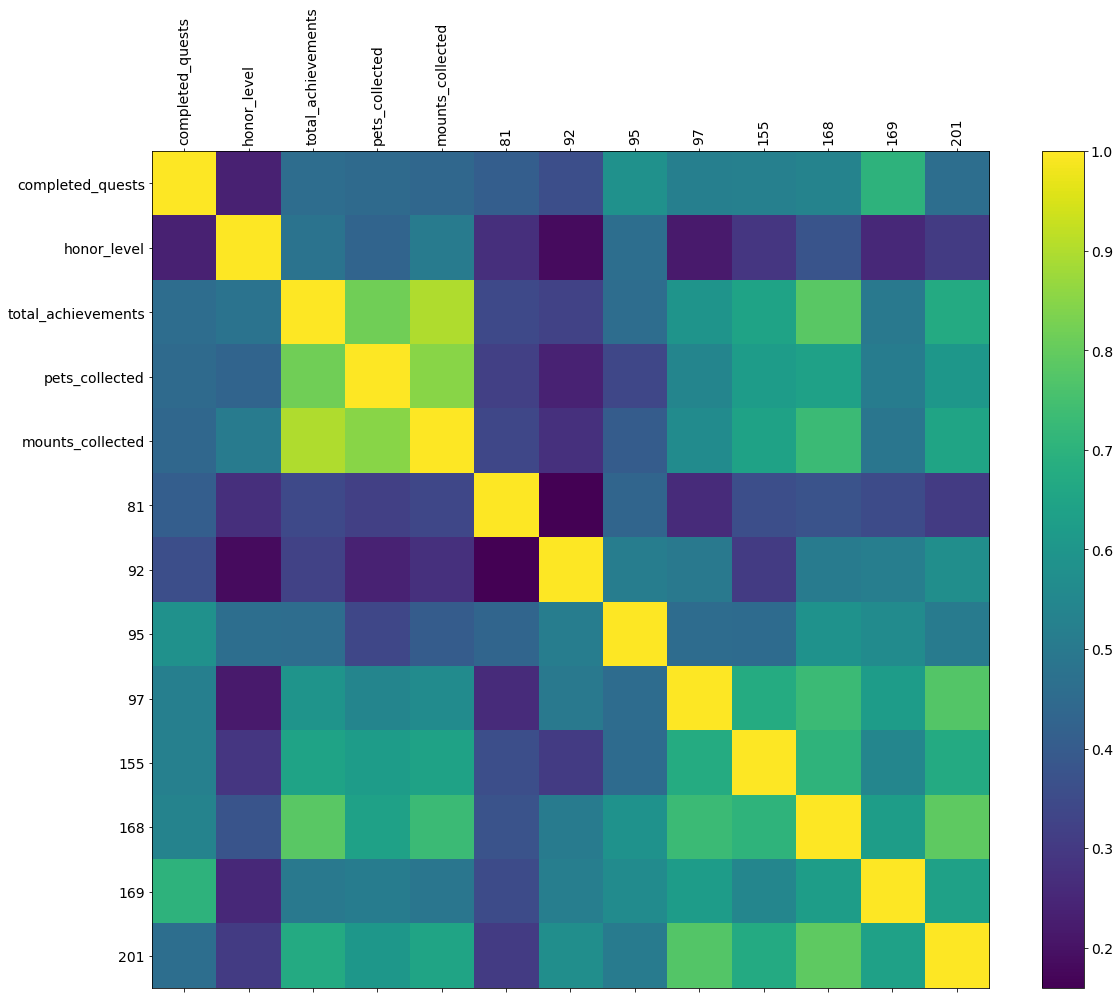

In [44]:
import matplotlib.pyplot as plt
key_features = ['completed_quests','honor_level', 'total_achievements', 'pets_collected',
               'mounts_collected', '81','92','95','97','155','168', '169','201']

key_features_names = ['Completed Quests','Honor Level', 'Total Achievements', 
                      'Pets Collected','mounts_collected', 'Feats of Strength',
                      'Character','PVP','Exploration','World Events','Dungeons and Raids',
                      'Professions','Reputation']


fig = plt.figure(figsize=(19, 15))
plt.matshow(df_all[key_features].corr(), fignum=fig.number)
plt.xticks(range(df_all[key_features].shape[1]), df_all[key_features], fontsize=14, rotation=90)
plt.yticks(range(df_all[key_features].shape[1]), df_all[key_features], fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

#### Achievement Category Legend
- 81   Feats of Strength
- 92   Character/Leveling
- 95   PVP
- 97   Exploration
- 155  World Events
- 168  Dungeons and Raids
- 169  Professions/Crafting
- 201  Reputation

Working with only 150,000 samples took more than an hour. Will look into spark and aws

In [45]:
# Don't do more than 50 estimators or it will crash
selected = RandomForestClassifier(n_estimators = 50,n_jobs = -1,
                           oob_score = True,bootstrap = True,random_state = 42)
selected.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, n_jobs=-1, oob_score=True,
                       random_state=42)

In [56]:
pred = selected.predict(X_train)

In [57]:
print(pred)

[1183 1969 2298 ... 3145 1219 1510]


In [58]:
print(pred))

['T', '__abs__', '__add__', '__and__', '__array__', '__array_finalize__', '__array_function__', '__array_interface__', '__array_prepare__', '__array_priority__', '__array_struct__', '__array_ufunc__', '__array_wrap__', '__bool__', '__class__', '__complex__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dir__', '__divmod__', '__doc__', '__eq__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__ilshift__', '__imatmul__', '__imod__', '__imul__', '__index__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__irshift__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lshift__', '__lt__', '__matmul__', '__mod__', '__mul__', '__ne__', '__neg__', '__new__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rlshift_